# Exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_column',20)

In [3]:
df = pd.read_excel('titanic3.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
data = df.copy()
data.shape

(1309, 14)

In [5]:
data.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

In [6]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# missing values analysis

<AxesSubplot:>

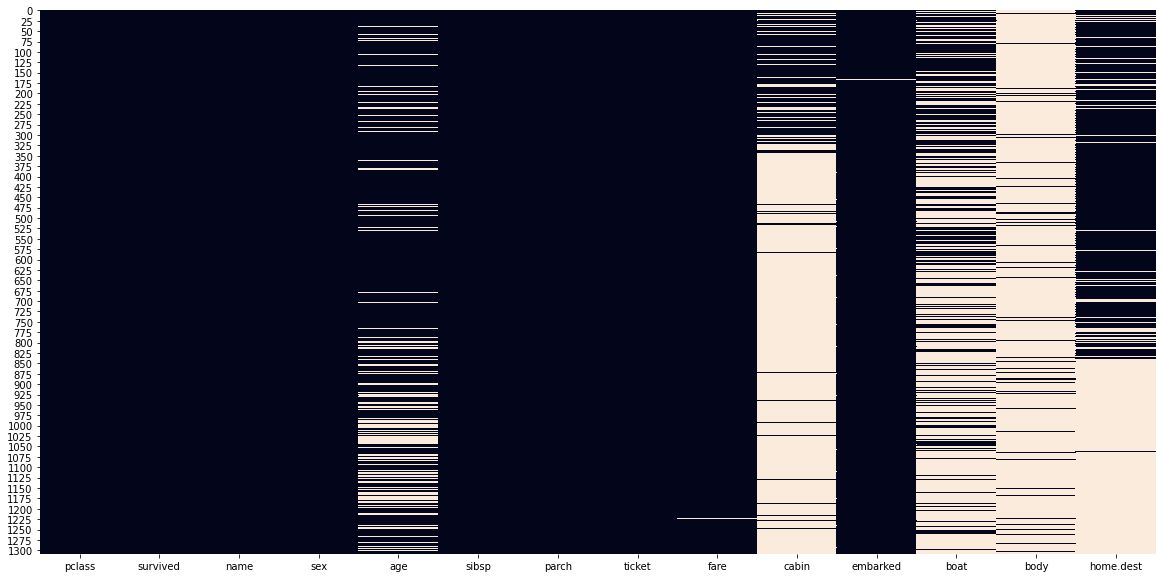

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar= False)

In [8]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

# examine the target column

In [9]:
data['survived'].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [10]:
data=data.drop(['body'],axis=1)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN


# histogramme des variables contenues 

/home/sonia/testJupyter/testJupyter/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sonia/testJupyter/testJupyter/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


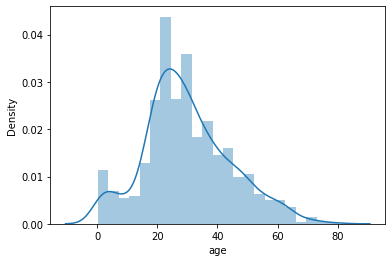

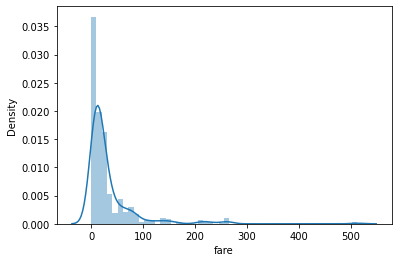

In [11]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.distplot(data[col])

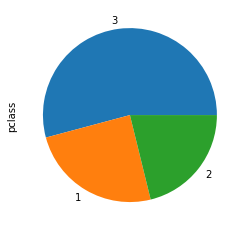

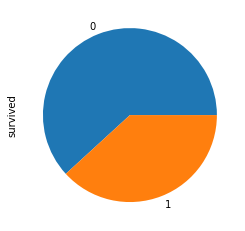

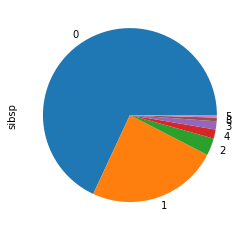

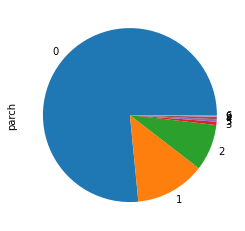

In [12]:
for col in data.select_dtypes('int'):
    plt.figure()
    data[col].value_counts().plot.pie()
    

# variables qualitatives 

In [13]:
for col in data.select_dtypes('object'):
    print(col)

name
sex
ticket
cabin
embarked
boat
home.dest


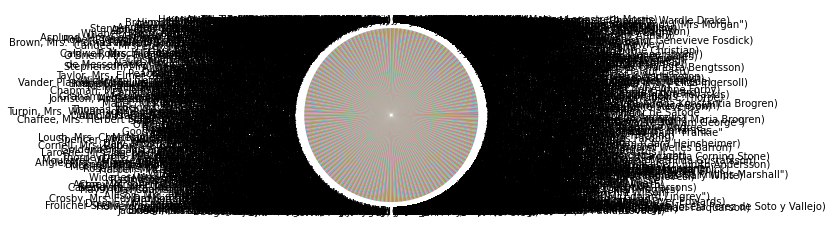

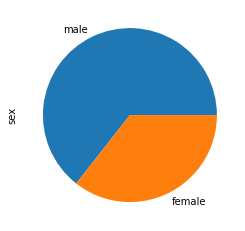

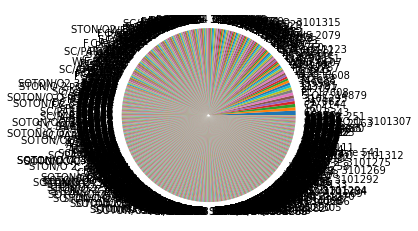

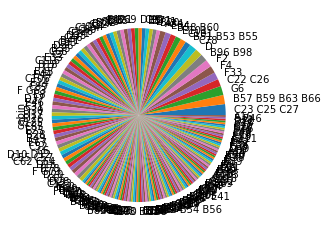

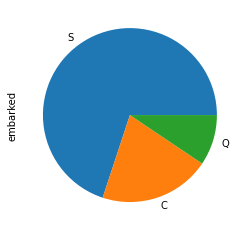

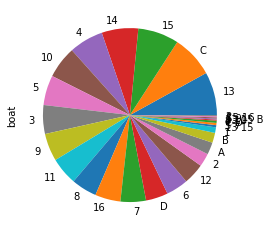

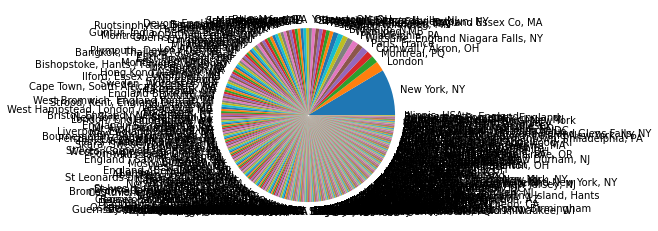

In [14]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

In [15]:
data=data.drop(['name','ticket','cabin','boat','home.dest'], axis=1)

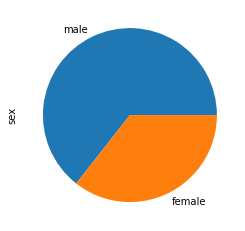

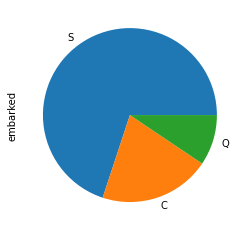

In [16]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

# Relation target /variable

## Création de sous-ensemble positive et négative 

In [17]:
data_survived=data[data['survived']==1]
data_not_survived=data[data['survived']==0]

variable_f=data.select_dtypes('float')
variable_f

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500
...,...,...
1304,14.5000,14.4542
1305,NaN,14.4542
1306,26.5000,7.2250
1307,27.0000,7.2250


/home/sonia/testJupyter/testJupyter/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sonia/testJupyter/testJupyter/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sonia/testJupyter/testJupyter/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

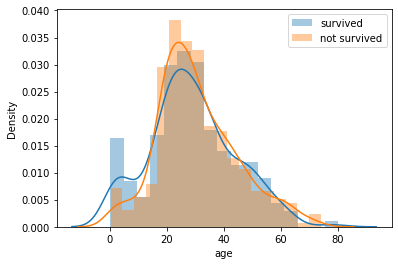

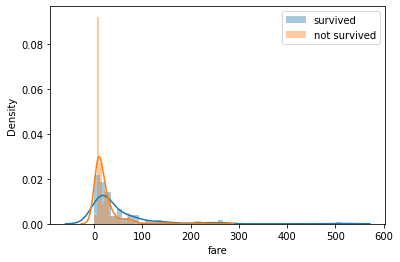

In [18]:
for col in variable_f:
    plt.figure()
    sns.distplot(data_survived[col],label='survived')
    sns.distplot(data_not_survived[col],label='not survived')
    plt.legend()

In [19]:
variable_i=data.select_dtypes('int')
variable_i

,pclass,survived,sibsp,parch
0,1,1,0,0
1,1,1,1,2
2,1,0,1,2
3,1,0,1,2
4,1,0,1,2
...,...,...,...,...
1304,3,0,1,0
1305,3,0,1,0
1306,3,0,0,0
1307,3,0,0,0


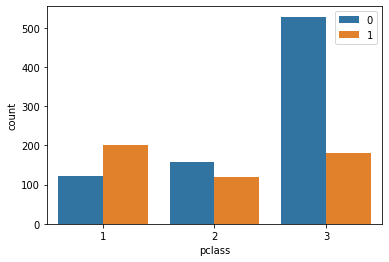

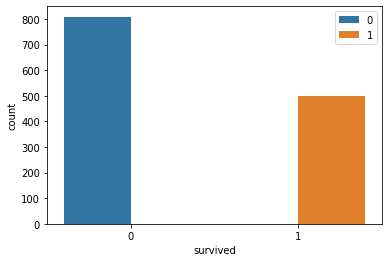

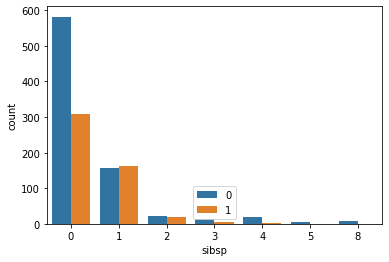

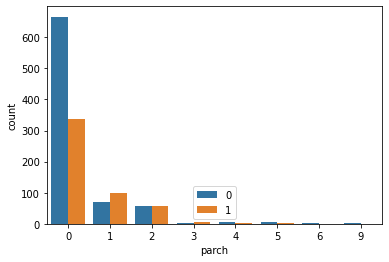

In [20]:
for col in variable_i:
    plt.figure()
    sns.countplot(x=col, hue='survived',data=data)
    plt.legend()

In [21]:
variable_o=data.select_dtypes('object')
variable_o

,sex,embarked
0,female,S
1,male,S
2,female,S
3,male,S
4,female,S
...,...,...
1304,female,C
1305,female,C
1306,male,C
1307,male,C


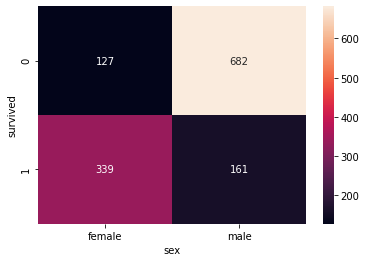

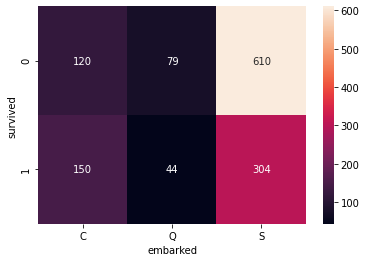

In [22]:
for col in variable_o :
    plt.figure()
    sns.heatmap(pd.crosstab(data['survived'], data[col]),annot=True, fmt='d' )
    